In [ ]:
import pandas as pd

from scipy import stats

In [ ]:
lin_grid = pd.read_csv("carbon_emissions_lin_grid.csv")
lin_grid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   timestamp           10 non-null     object 
 1   project_name        10 non-null     object 
 2   run_id              10 non-null     object 
 3   duration            10 non-null     float64
 4   emissions           10 non-null     float64
 5   emissions_rate      10 non-null     float64
 6   cpu_power           10 non-null     float64
 7   gpu_power           10 non-null     float64
 8   ram_power           10 non-null     float64
 9   cpu_energy          10 non-null     float64
 10  gpu_energy          10 non-null     float64
 11  ram_energy          10 non-null     float64
 12  energy_consumed     10 non-null     float64
 13  country_name        10 non-null     object 
 14  country_iso_code    10 non-null     object 
 15  region              10 non-null     object 
 16  cloud_provi

In [ ]:
lin_grid_energy = lin_grid["energy_consumed"]
lin_grid_energy

0    0.000003
1    0.000003
2    0.000003
3    0.000008
4    0.000003
5    0.000003
6    0.000002
7    0.000003
8    0.000003
9    0.000009
Name: energy_consumed, dtype: float64

In [ ]:
def get_energy(path):
  df = pd.read_csv(path)
  df = df["energy_consumed"]

  # Get first 10 only
  df = df[:10]

  return df

In [ ]:
rf_bayes_energy = get_energy("carbon_emissions_rf_bayesian.csv")
rf_grid_energy = get_energy("carbon_emissions_rf_grid.csv")
rf_random_energy = get_energy("carbon_emissions_rf_random.csv")
xgb_grid_energy = get_energy("carbon_emissions_xgb_grid.csv")

In [ ]:
rf_bayes_energy

0    0.000560
1    0.000589
2    0.000541
3    0.000565
4    0.000583
5    0.001275
6    0.001188
7    0.001090
8    0.001121
9    0.001036
Name: energy_consumed, dtype: float64

In [ ]:
rf_grid_energy

0    0.003884
1    0.004103
2    0.003978
3    0.004448
4    0.004616
5    0.002476
6    0.002422
7    0.002389
8    0.002388
9    0.003860
Name: energy_consumed, dtype: float64

In [ ]:
rf_random_energy

0    0.001255
1    0.001044
2    0.001002
3    0.001003
4    0.001000
5    0.000989
6    0.001061
7    0.001010
8    0.000992
9    0.001008
Name: energy_consumed, dtype: float64

In [ ]:
xgb_grid_energy

0    0.000041
1    0.000042
2    0.000043
3    0.000043
4    0.000042
5    0.000043
6    0.000040
7    0.000041
8    0.000047
9    0.000041
Name: energy_consumed, dtype: float64

In [ ]:
fvalue, pvalue = stats.f_oneway(lin_grid_energy, rf_bayes_energy, rf_grid_energy, rf_random_energy, xgb_grid_energy)
print("F Value = {:g} ".format(fvalue))
print("P Value = {:g} ".format(pvalue))
alpha = 0.01
if pvalue < alpha: # null hypothesis: x comes from a normal distribution
  print("The null hypothesis can be rejected")
else:
  print("The null hypothesis is accepted")

F Value = 103.868 
P Value = 4.01424e-22 
The null hypothesis can be rejected


In [ ]:
lin_grid_emissions= lin_grid["emissions"]
lin_grid_emissions

0    6.670000e-07
1    8.390000e-07
2    7.100000e-07
3    2.020000e-08
4    7.250000e-07
5    8.030000e-07
6    6.330000e-07
7    6.940000e-07
8    7.330000e-07
9    2.160000e-08
Name: emissions, dtype: float64

In [ ]:
def get_emissions(path):
  df = pd.read_csv(path)
  df = df["emissions"]

  # Get first 10 only
  df = df[:10]

  return df


In [ ]:
rf_bayes_emissions = get_emissions("carbon_emissions_rf_bayesian.csv")
rf_grid_emissions = get_emissions("carbon_emissions_rf_grid.csv")
rf_random_emissions = get_emissions("carbon_emissions_rf_random.csv")
xgb_grid_emissions = get_emissions("carbon_emissions_xgb_grid.csv")

In [ ]:
fvalue, pvalue = stats.f_oneway(lin_grid_emissions, rf_bayes_emissions, rf_grid_emissions, rf_random_emissions, xgb_grid_emissions)
print("F Value = {:g} ".format(fvalue))
print("P Value = {:g} ".format(pvalue))
alpha = 0.01
if pvalue < alpha: # null hypothesis: x comes from a normal distribution
  print("The null hypothesis can be rejected")
else:
  print("The null hypothesis is accepted")

F Value = 104.026 
P Value = 3.8926e-22 
The null hypothesis can be rejected


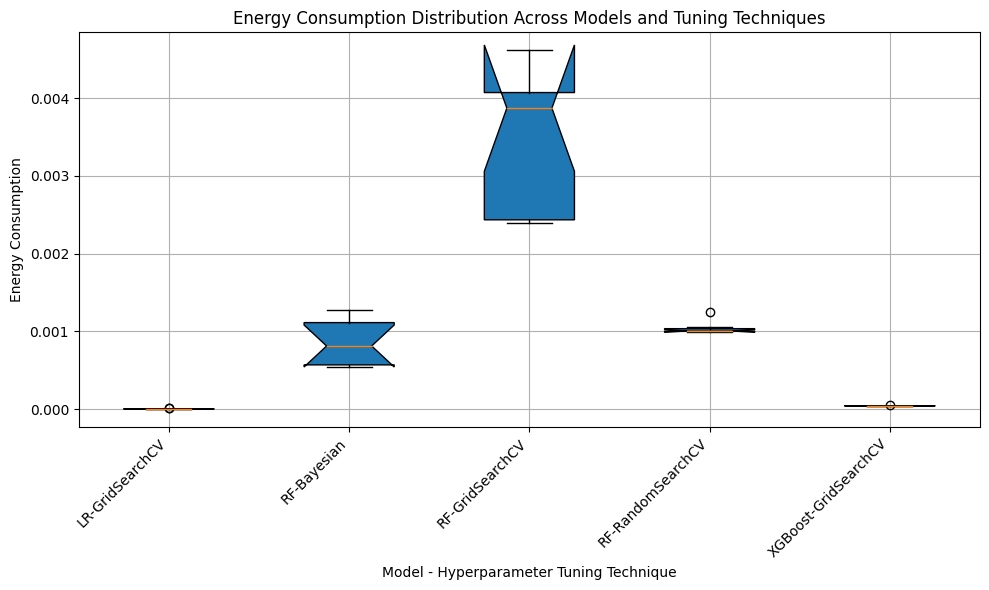

<Figure size 640x480 with 0 Axes>

In [ ]:
# Visualization: Boxplots
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.boxplot([lin_grid_energy, rf_bayes_energy, rf_grid_energy, rf_random_energy, xgb_grid_energy],
            notch=True, vert=True, patch_artist=True, labels=['LR-GridSearchCV', 'RF-Bayesian', 'RF-GridSearchCV', 'RF-RandomSearchCV', 'XGBoost-GridSearchCV'])
plt.xlabel('Model - Hyperparameter Tuning Technique')
plt.ylabel('Energy Consumption')
plt.title('Energy Consumption Distribution Across Models and Tuning Techniques')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()
plt.savefig("distibution.png", dpi=None, bbox_inches='tight', transparent=False)


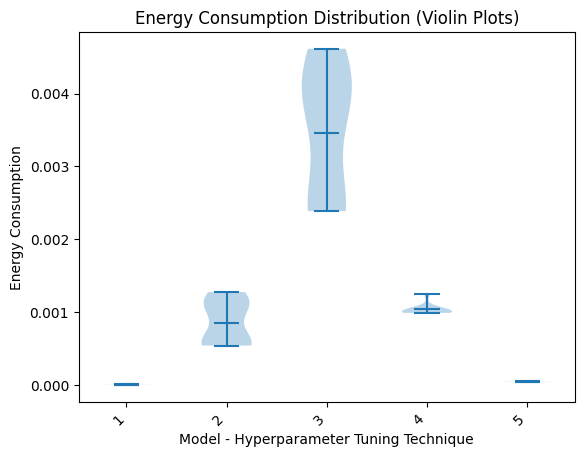

In [ ]:
 plt.violinplot([lin_grid_energy, rf_bayes_energy, rf_grid_energy, rf_random_energy, xgb_grid_energy], showmeans=True)
 plt.xlabel('Model - Hyperparameter Tuning Technique')
 plt.ylabel('Energy Consumption')
 plt.title('Energy Consumption Distribution (Violin Plots)')
 plt.xticks(rotation=45, ha='right')
 plt.show()

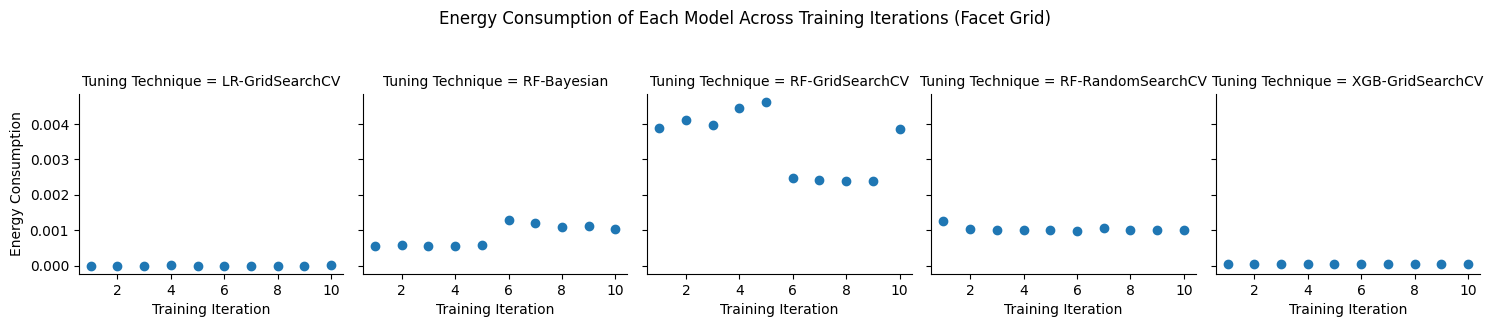

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data (assuming you have energy consumption for each model and training iteration)
data = {'Tuning Technique': [], 'Training Iteration': [], 'Energy Consumption': []}
for model_name, energy_data in zip(['LR-GridSearchCV', 'RF-Bayesian', 'RF-GridSearchCV', 'RF-RandomSearchCV', 'XGB-GridSearchCV'],
                                    [lin_grid_energy, rf_bayes_energy, rf_grid_energy, rf_random_energy, xgb_grid_energy]):
  for i in range(len(energy_data)):
    data['Tuning Technique'].append(model_name)
    data['Training Iteration'].append(i + 1)  # Assuming iterations start from 1
    data['Energy Consumption'].append(energy_data[i])

df = pd.DataFrame(data)

# Create scatter plot with facet grid
g = sns.FacetGrid(df, col="Tuning Technique")
g.map(plt.scatter, "Training Iteration", "Energy Consumption")
g.set_axis_labels("Training Iteration", "Energy Consumption")
g.fig.suptitle('Energy Consumption of Each Model Across Training Iterations (Facet Grid)')
g.fig.subplots_adjust(top=0.7, bottom =0.1)  # Adjust spacing to avoid title being cut off
plt.show()
g.fig.savefig("anova.png", bbox_inches='tight')
